In [4]:
import numpy as np
import pandas as pd
import datetime as dt
import pickle

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

In [2]:
with open("../data/myocardial_infarction.txt", "r") as f:
    lines = [line.rstrip('\n') for line in f]
    
lines = [line.replace('"', '') for line in lines]

split_lines = [line.split("\t") for line in lines]

df = pd.DataFrame(data=split_lines[1:], columns=split_lines[0])

In [5]:
df['Month'] = pd.to_datetime(df['Month'])
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')

deaths_grouped_state = df.groupby(['State'])[['Month', 'Deaths']]

state_mortality_dict = {}

for state in deaths_grouped_state.groups.keys():
    state_mortality_dict[state] = deaths_grouped_state.get_group(state).set_index('Month')

In [7]:
with open("../data/myocardial_infarction_df_state_mortality_dict.pkl", "wb") as picklefile:
    pickle.dump([df, state_mortality_dict], picklefile)

In [8]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/MASS/drivers.csv")

In [15]:
data.index = data['time'];
data.loc[(data['time']>=1983.05), 'seat_belt'] = 1;
data.loc[(data['time']<1983.05), 'seat_belt'] = 0;
data.loc[(data['time']>=1974.00), 'oil_crisis'] = 1;
data.loc[(data['time']<1974.00), 'oil_crisis'] = 0;

In [20]:
data.rename(columns={'value':'drivers'}, inplace=True)

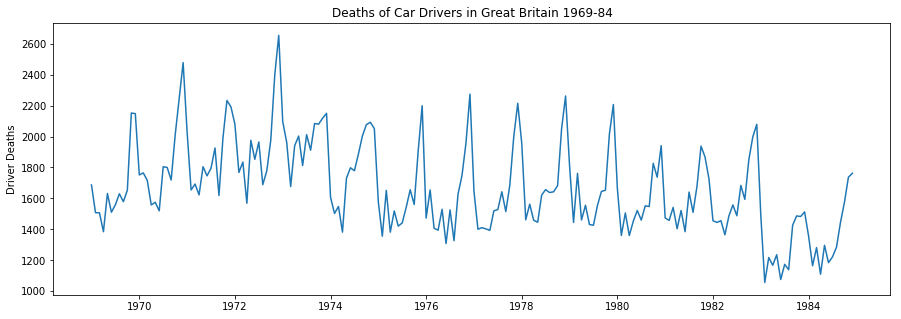

In [21]:
plt.figure(figsize=(15,5));
plt.plot(data.index, data['drivers']);
plt.ylabel('Driver Deaths');
plt.title('Deaths of Car Drivers in Great Britain 1969-84');
plt.plot();

In [22]:
model = pf.ARIMAX(data=data, formula='drivers~1+seat_belt+oil_crisis',
                  ar=1, ma=1, family=pf.Normal())
x = model.fit("MLE")
x.summary()

Normal ARIMAX(1,0,1)                                                                                      
======================================================= ==================================================
Dependent Variable: drivers                             Method: MLE                                       
Start Date: 1969.08333333333                            Log Likelihood: -1278.7644                        
End Date: 1984.91666666667                              AIC: 2569.5288                                    
Number of observations: 191                             BIC: 2589.0424                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.5004     0.0933     5.3637   0.0      (0.3175 | 0.6832)        
MA(1)                                

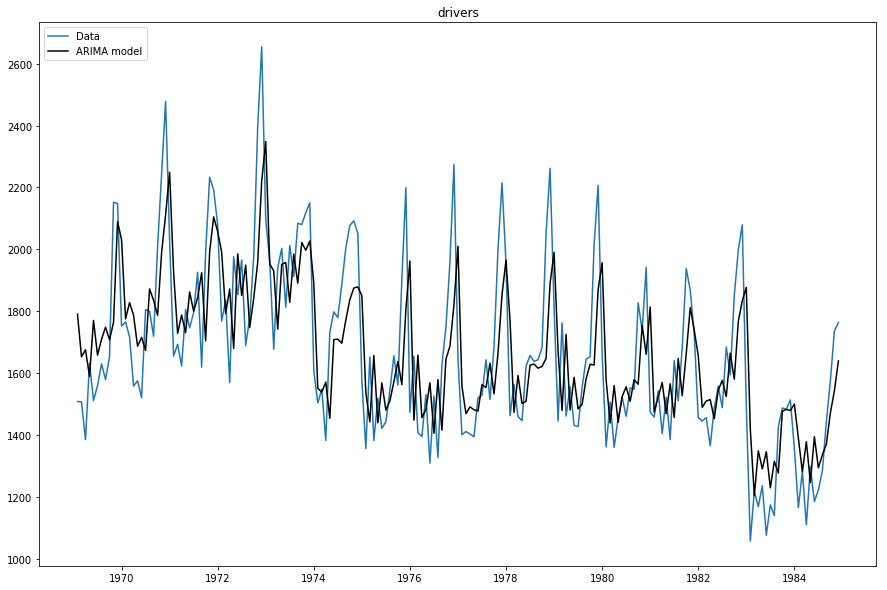

In [23]:
model.plot_fit(figsize=(15,10))

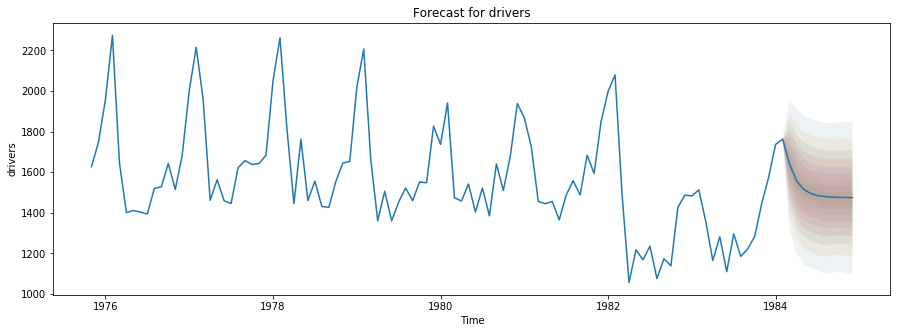

In [24]:
model.plot_predict(h=10, oos_data=data.iloc[-12:], past_values=100, figsize=(15,5))